# Function Optimization by Various Methods

In this code, 
- we define the Himmelblau function, 
- generate a grid of points for plotting, 
- and then loop through different optimization methods using the `scipy.optimize.minimize` function. 

We plot the optimization progress using red markers for the final optimized point for each method, along with an annotation of the method name. 

Finally, we display the plot with the Himmelblau function and the optimization progress.

Note that the choice of initial guess (x0) and other optimization parameters can affect the optimization results. You can experiment with different initial guesses and optimization options to see how they impact the optimization process.

See [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) for the optimization documentation from SciPy.

## Problem Formulation

The Himmelblau function is defined as

$$ f(x,y) = (x^2 + y - 11)^2 + (x + y^2 -7)^2 . $$

It has four identical local minima 

$$\begin{aligned}
f(x_*) = 0 & \quad \text{at} \quad  x_* = (3, 2), \\
f(x_*) = 0 & \quad \text{at} \quad  x_* = (-2.8051, 3.2832), \\
f(x_*) = 0 & \quad \text{at} \quad  x_* = (−3.7793, −3.2832), \\
f(x_*) = 0 & \quad \text{at} \quad  x_* = (3.5845, −1.8481), 
\end{aligned}$$

and one local maximum,

$$
f(x_*) = 181.167 \quad \text{at} \quad  x_* = (-0.2708, −0.9230) .
$$

The Himmelblau Function is defined on the two dimensional space, used to test the performance of optimization algorithms such as:
- Convergence rate
- Precision
- Robustness 

The Himmelblau function has the following properties:
- Multi-modal 
- Non-separable
- Non-convex
- Continuous 

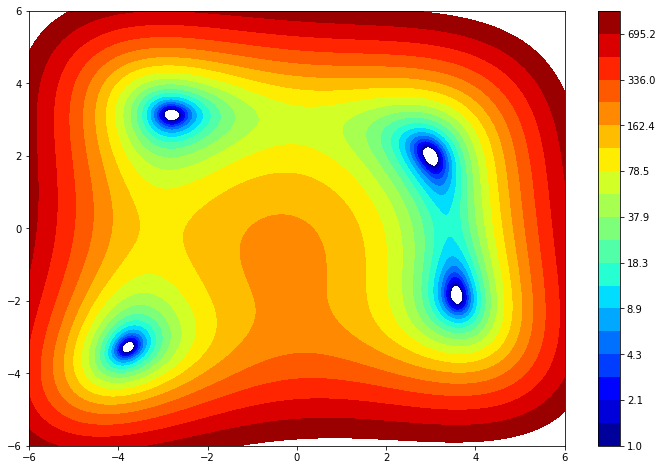

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Himmelblau function
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Generate grid points for plotting the function
x_range = np.linspace(-6, 6, 400)
y_range = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = himmelblau([X, Y])

# Plot the Himmelblau function
from matplotlib.colors import LogNorm

plt.figure(figsize=(12,8))
plt.contourf(X, Y, Z, cmap="jet", levels=np.logspace(0, 3, 20), norm=LogNorm())
plt.colorbar()
plt.show()

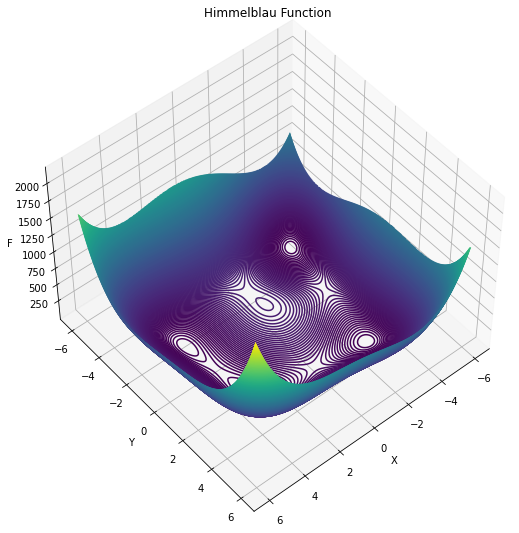

In [2]:
fig =plt.figure(figsize=(9,9))
ax=plt.axes(projection='3d')
ax.contour3D(X,Y,Z,450)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F')
ax.set_title('Himmelblau Function')
ax.view_init(50,50)

In code below, we use a loop to iterate through the optimization methods and associated colors. 

- We perform optimization with a maximum of 1000 iterations for each method and plot the iteration history using `iteration_history` which contains the intermediate points explored during optimization. 
- The label argument is used for each method's line plot to create a legend. 
- Finally, we include the legend and display the plot with the Himmelblau function, the optimization progress, and the iteration history for all methods.

Optimizing using Nelder-Mead...
Optimizing using BFGS...
Optimizing using CG...
Optimizing using L-BFGS-B...
Optimization complete.


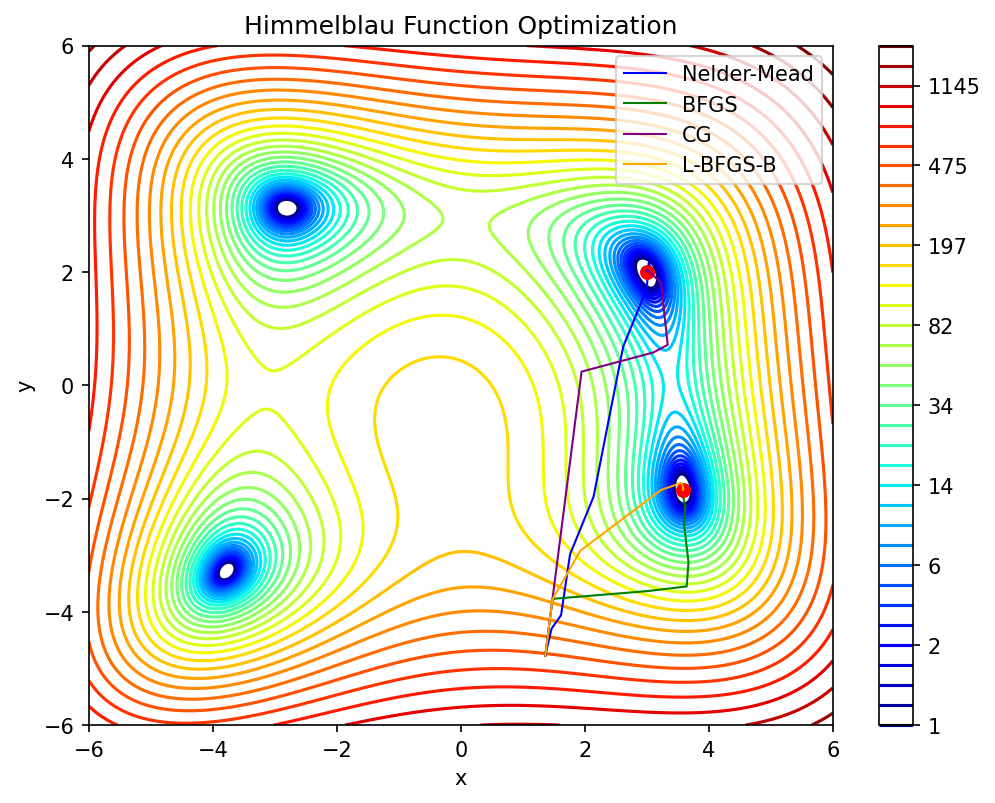

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Himmelblau function
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Generate grid points for plotting the function
x_range = np.linspace(-6, 6, 400)
y_range = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x_range, y_range)
Z = himmelblau([X, Y])

# Plot the Himmelblau function
#plt.contourf(X, Y, Z, levels=50, cmap="jet")

plt.subplots(dpi=150, figsize=(8, 6))
plt.contour(X, Y, Z, levels=np.logspace(0, 3.25, 35), norm=LogNorm(), cmap=plt.cm.jet)
plt.colorbar()

# Optimization methods
methods = ['Nelder-Mead', 'BFGS', 'CG', 'L-BFGS-B']#, 'TNC']
colors = ['blue', 'green', 'purple', 'orange']#, 'cyan']

# Choose an initial guess (starting point)
#target = [3, 2]
#easy_init = [3.1, 2.1]
#hard_init = [-0.27, -0.9]

#x0 = np.array([0.,0.])
#x0 = np.array([-0.5,0.])
#x0 = np.array([-0.5,-0.5])
#x0 = np.array([0.5,-0.5])
#x0 = np.array([-1.23633,-1.11064])
#x0 = np.array([0.295466,-1.2946])
#x0 = np.array([0.3616,4.9298])
x0 = np.array([1.362,-4.774])

# Perform optimization for each method and plot progress
for method, color in zip(methods, colors):
    print(f"Optimizing using {method}...")
    
    # Random initial guess
    #x0 = np.random.uniform(-6, 6, size=2)
    
    # Initialize a list to track iteration history
    iteration_history = [x0]
    
    # Custom optimization loop
    def callback(xk):
        iteration_history.append(xk)
    
    # Perform optimization
    # - change 'disp': False to 'disp': True to see iteration histories
    result = minimize(himmelblau, x0, method=method, options={'disp': False, 'maxiter': 1000}, callback=callback)
    
    # Plot optimization progress
    plt.plot(result.x[0], result.x[1], 'ro', markersize=6)
 
    # Plot iteration history
    iteration_history = np.array(iteration_history)
    plt.plot(iteration_history[:, 0], iteration_history[:, 1], color=color, linewidth=1, label=method)

print("Optimization complete.")
plt.title("Himmelblau Function Optimization")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Conclusions

1. The convergence is very sensitive to the initial guess.
2. Each method advances differently fom a given initial guess, and can converge to a different local minimum from the others.
3. In higher dimensions and with noisy functions, multivariable optimization remains a big challenge.